In [1]:
from casatasks import *
# from casatools import *
import casatools
import os
from selfcal import *

# from calibration_script_v3 import *
from casaplotms import plotms
from casaviewer.imview import imview

msmd = casatools.msmetadata()
ms = casatools.ms()
tb = casatools.table()



In [2]:
import sys
sys.path.append('../libs/')

# from libs import *


In [3]:
from plotting import *
from read_data import *
from image_operations import *


In [4]:
# imview()

In [5]:
path = '/media/sagauga/storage_wd_2/astronomical_data/lirgi/vla/L_band/'
name = path + '18A-095.sb35122044.eb35463311.58270.937465740746_short'
vis = name + '.ms'

In [6]:
# # proj_name = '.calibrated'
# proj_name = '_combined_w_0.75'
# image_list = ['UGC8696']#,'VV250a','VV705']
path = '/run/media/sagauga/storage_wd_2/astronomical_data/lirgi/vla/C_band/AL746/CGCG448-020/'
field = 'CGCG448-020'
proj_name = '.AL746_combined.calibrated.avg8s'
g_name = path + field + proj_name
g_vis = g_name + '.ms'

In [17]:
g_name

'/run/media/sagauga/storage_wd_2/astronomical_data/lirgi/vla/C_band/AL746/CGCG448-020/CGCG448-020.AL746_combined.calibrated.avg8s'

In [18]:
steps=['save_init_flags']

In [15]:
statwt(vis=g_vis,datacolumn='data')

....10....20....30....40....50....60....70....80....90....100%


{'mean': 142.85392118087216, 'variance': 50120.305181785116}

In [ ]:
if 'save_init_flags' in steps:
    if not os.path.exists(path+'selfcal/'):
        os.makedirs(path+'selfcal/')
    if not os.path.exists(path+'selfcal/plots'):
        os.makedirs(path+'selfcal/plots')
    if not os.path.exists(g_name+'.ms.flagversions/flags.Original/'):
        flagmanager(vis=g_name+'.ms',mode='save',versionname='Original',
            comment='Original flags.')
    else:
        print('     ==> Skipping flagging backup init (exists).')

In [6]:
steps=['restore_init_flags']

In [7]:
if 'restore_init_flags' in steps:
    try:
        print('     ==> Restoring flags to original...')
        flagmanager(vis=g_name+'.ms',mode='restore',versionname='Original')
#         delmod(vis=g_name + '.ms')
#         clearcal(vis=g_name + '.ms')
        print('     ==> Renaming selfcal/ folder to selfcal.old/ ')
#         os.system('mv selfcal/ selfcal.old/')
    except:
        pass

     ==> Restoring flags to original...
     ==> Renaming selfcal/ folder to selfcal.old/ 


In [8]:
summary = flagdata(vis=g_name+'.ms', field='',mode='summary')
report_flag(summary,'field')

field CGCG448-020:  41.7 percent flagged


In [6]:
os.environ['SAVE_ALL_AUTOMASKS']="false"

In [9]:
steps=['0']

In [10]:
if '0' in steps:
    ############################################################################
    #### 0. Zero interaction. Use a small/negative robust parameter,        ####
    ####    to find the bright/compact emission(s).                         ####
    ############################################################################
    robust = 0.0 #decrease more if lots of failed solutions.
    niter = 500
    threshold = '20.0e-6Jy'

    start_image(g_name,field,0,delmodel=False,PLOT=True,niter=niter,
        interactive=interactive,usemask=usemask,datacolumn='data')

#     # check_solutions(g_name,field,calmode='p',combine='scan')
#     gain_tables_selfcal_temp=self_gain_cal(g_name,field,n_interaction=0,
#         niter=niter,
#         minsnr = 1.0,solint = '240s',flagbackup=True,combine='',
#         calmode='p',action='calculate',PLOT=True)

    # robust = 0.0
    # image_selfcal(g_name,field,n_interaction=0,interactive=False,usemask=usemask)

selfcal/0_start_image_interactive_CGCG448-020.AL746_combined.calibrated.avg8s_3072_0.05arcsec_500.briggs.0.0.mfs.mtmfs.standard.image


2023-07-17 01:06:33	SEVERE	MeasTable::dUTC(Double) (file casacore/measures/Measures/MeasTable.cc, line 4292)	Leap second table TAI_UTC seems out-of-date.
2023-07-17 01:06:33	SEVERE	MeasTable::dUTC(Double) (file casacore/measures/Measures/MeasTable.cc, line 4292)+	Until the table is updated (see the CASA documentation or your system admin),
2023-07-17 01:06:33	SEVERE	MeasTable::dUTC(Double) (file casacore/measures/Measures/MeasTable.cc, line 4292)+	times and coordinates derived from UTC could be wrong by 1s or more.

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%
Qt: Session management error: None of the authentication protocols specified are supported

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90.

(0) waiting for viewer process...
(1) waiting for viewer process...
(2) waiting for viewer process...
(3) waiting for viewer process...


Qt: Session management error: None of the authentication protocols specified are supported


(4) waiting for viewer process...
	...{'id': 'casaviewer:b246', 'priority': 0, 'types': array(['shutdown', 'image-view', 'interactive-clean'], dtype='<U18'), 'uri': '0.0.0.0:45405'}


E0717 09:41:59.030668369    7960 call.cc:896]                Invalid entry in accept encoding metadata: ' deflate'. Ignoring.
E0717 09:41:59.030733967    7960 call.cc:896]                Invalid entry in accept encoding metadata: ' gzip'. Ignoring.
Qt: Session management error: None of the authentication protocols specified are supported
E0717 09:42:07.761279698    8036 call.cc:896]                Invalid entry in accept encoding metadata: ' deflate'. Ignoring.
E0717 09:42:07.761293693    8036 call.cc:896]                Invalid entry in accept encoding metadata: ' gzip'. Ignoring.


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is cur

2 of 46 solutions flagged due to SNR < 1 in spw=10 at 2011/07/05/09:21:46.2
3 of 48 solutions flagged due to SNR < 1 in spw=11 at 2011/07/05/09:21:40.6
2 of 40 solutions flagged due to SNR < 1 in spw=12 at 2011/07/05/09:21:46.3
1 of 48 solutions flagged due to SNR < 1 in spw=13 at 2011/07/05/09:21:46.4
1 of 48 solutions flagged due to SNR < 1 in spw=14 at 2011/07/05/09:21:46.4
1 of 46 solutions flagged due to SNR < 1 in spw=15 at 2011/07/05/09:21:46.2
1 of 50 solutions flagged due to SNR < 1 in spw=1 at 2011/07/05/09:22:34.5
2 of 50 solutions flagged due to SNR < 1 in spw=4 at 2011/07/05/09:22:34.5
1 of 50 solutions flagged due to SNR < 1 in spw=5 at 2011/07/05/09:22:34.5
 Insufficient unflagged antennas to proceed with this solve.
   (time=2011/07/05/09:22:08.5 field=0 spw=9 chan=0)
1 of 48 solutions flagged due to SNR < 1 in spw=9 at 2011/07/05/09:22:34.8
 Insufficient unflagged antennas to proceed with this solve.
   (time=2011/07/05/09:22:08.5 field=0 spw=11 chan=0)
2 of 50 solutio

NameError: name 'tb' is not defined

In [11]:
if '0' in steps:
    # check_solutions(g_name,field,calmode='p',combine='scan')
    robust = 0.0 #decrease more if lots of failed solutions.
    niter = 500
    refant = 'ea28'
    threshold = '20.0e-6Jy'
    gain_tables_selfcal_temp=self_gain_cal(g_name,field,n_interaction=0,
        niter=niter,
        minsnr = 1.3,solint = 'inf',flagbackup=True,combine='',
        calmode='p',action='apply',PLOT=False)

    # robust = 0.0
    # image_selfcal(g_name,field,n_interaction=0,interactive=False,usemask=usemask)

4 of 44 solutions flagged due to SNR < 1.29999995232 in spw=1 at 2011/06/29/09:42:14.2
1 of 44 solutions flagged due to SNR < 1.29999995232 in spw=2 at 2011/06/29/09:42:14.3
4 of 46 solutions flagged due to SNR < 1.29999995232 in spw=3 at 2011/06/29/09:42:14.4
9 of 46 solutions flagged due to SNR < 1.29999995232 in spw=4 at 2011/06/29/09:42:15.5
2 of 46 solutions flagged due to SNR < 1.29999995232 in spw=5 at 2011/06/29/09:42:17.1
2 of 44 solutions flagged due to SNR < 1.29999995232 in spw=6 at 2011/06/29/09:42:14.2
2 of 44 solutions flagged due to SNR < 1.29999995232 in spw=7 at 2011/06/29/09:42:14.3
2 of 44 solutions flagged due to SNR < 1.29999995232 in spw=8 at 2011/06/29/09:42:14.3
2 of 44 solutions flagged due to SNR < 1.29999995232 in spw=9 at 2011/06/29/09:42:14.3
1 of 44 solutions flagged due to SNR < 1.29999995232 in spw=10 at 2011/06/29/09:42:14.3
1 of 46 solutions flagged due to SNR < 1.29999995232 in spw=11 at 2011/06/29/09:42:14.3
1 of 44 solutions flagged due to SNR < 1.

3 of 50 solutions flagged due to SNR < 1.29999995232 in spw=16 at 2011/07/05/09:18:36.0
1 of 52 solutions flagged due to SNR < 1.29999995232 in spw=5 at 2011/07/05/09:19:24.5
1 of 52 solutions flagged due to SNR < 1.29999995232 in spw=6 at 2011/07/05/09:19:24.5
 Insufficient unflagged antennas to proceed with this solve.
   (time=2011/07/05/09:18:58.5 field=0 spw=7 chan=0)
6 of 52 solutions flagged due to SNR < 1.29999995232 in spw=8 at 2011/07/05/09:19:24.5
 Insufficient unflagged antennas to proceed with this solve.
   (time=2011/07/05/09:18:58.5 field=0 spw=11 chan=0)
2 of 54 solutions flagged due to SNR < 1.29999995232 in spw=11 at 2011/07/05/09:19:24.4
1 of 52 solutions flagged due to SNR < 1.29999995232 in spw=13 at 2011/07/05/09:19:24.5
1 of 54 solutions flagged due to SNR < 1.29999995232 in spw=14 at 2011/07/05/09:19:24.6
2 of 52 solutions flagged due to SNR < 1.29999995232 in spw=16 at 2011/07/05/09:19:24.6
1 of 48 solutions flagged due to SNR < 1.29999995232 in spw=1 at 2011/

3 of 46 solutions flagged due to SNR < 1.29999995232 in spw=9 at 2011/08/16/06:39:49.2
2 of 46 solutions flagged due to SNR < 1.29999995232 in spw=10 at 2011/08/16/06:39:49.2
1 of 46 solutions flagged due to SNR < 1.29999995232 in spw=11 at 2011/08/16/06:39:49.2
1 of 46 solutions flagged due to SNR < 1.29999995232 in spw=12 at 2011/08/16/06:39:49.2
3 of 46 solutions flagged due to SNR < 1.29999995232 in spw=14 at 2011/08/16/06:39:49.2
1 of 46 solutions flagged due to SNR < 1.29999995232 in spw=16 at 2011/08/16/06:39:49.2
2 of 46 solutions flagged due to SNR < 1.29999995232 in spw=5 at 2011/08/16/06:40:37.6
1 of 46 solutions flagged due to SNR < 1.29999995232 in spw=10 at 2011/08/16/06:40:37.5
1 of 46 solutions flagged due to SNR < 1.29999995232 in spw=16 at 2011/08/16/06:40:37.4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
P(<=1.3) = 15.935019841269842  ()
     => Creating new flagbackup file before mode  p  selfcal ...


2023-07-17 14:46:46	WARN	flagmanager::::casa	Version name 'before_selfcal_mode_p' already exist. Will rename it to before_selfcal_mode_p.old.1689605206


     => Reporting data flagged before selfcal apply interaction 0 ...
field CGCG448-020:  41.7 percent flagged
The following MS spws have no corresponding cal spws in 0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.3.tb: 0 
     => Reporting data flagged after selfcal apply interaction 0 ...
field CGCG448-020:  49.9 percent flagged


In [13]:
plotms(vis=gain_tables_selfcal_temp[0],yaxis='phase',xaxis='time',coloraxis='spw')

In [14]:
gain_tables_selfcal_temp

['selfcal/0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.3.tb']

In [15]:
steps=['1']

In [16]:
if '1' in steps:
    ############################################################################
    #### 1. First interaction. Increase a little the robust parameter,      ####
    ####    start to consider more extended emission.                       ####
    ############################################################################
    threshold = '5.0e-6Jy'
    niter = 800
    robust = 0.5 #or 0.5 if lots of extended emission.
    
    update_model_image(g_name,field,n_interaction=1,interactive=interactive,
        uvtaper=[],niter=niter,usemask=usemask,PLOT=True)



0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%
Qt: Session management error: Authentication Rejected, reason : None of the authentication protocols specified are supported and host-based authentication failed
unreasonably large dimensions...

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is cur

Qt: Session management error: Authentication Rejected, reason : None of the authentication protocols specified are supported and host-based authentication failed


(4) waiting for viewer process...
	...{'id': 'casaviewer:bd47', 'priority': 0, 'types': array(['shutdown', 'image-view', 'interactive-clean'], dtype='<U18'), 'uri': '0.0.0.0:34833'}


E0717 16:20:48.932551969    6342 call.cc:896]                Invalid entry in accept encoding metadata: ' deflate'. Ignoring.
E0717 16:20:48.932630077    6342 call.cc:896]                Invalid entry in accept encoding metadata: ' gzip'. Ignoring.
unreasonably large dimensions...


 Image (update) Statistics:
 Flux=0.00437 Jy/Beam
 Flux peak (image)=0.00201 Jy Flux peak (residual)=0.00007 Jy
 flux_im/sigma_im=140.80081 flux_im/sigma_re=363.12528
 rms_im=0.00003 rms_re=0.00001
 flux_peak_im/rms_im=64.89537 flux_peak_re/rms_re=5.92244
 sumsq_im/sumsq_re=6.65124


Usually, the first table (calculated with solint=`inf`) can be ignored. We may proceed with the 1st 'valid' self-calibration iteration, where we can select again `solint='inf'` or finite larger solution interval, e.g. `solint = '240s'`. The choice will depend heavily on your data. You can use `action = 'calculate'` below to see the amount of data flagged given a particular solution interval.

In [22]:
if '1' in steps:
    ############################################################################
    #### 1. First interaction. Increase a little the robust parameter,      ####
    ####    start to consider more extended emission.                       ####
    ############################################################################
    threshold = '5.0e-6Jy'
    niter = 800
    robust = 0.5 #or 0.5 if lots of extended emission.

    gain_tables_selfcal_temp=self_gain_cal(g_name,field,n_interaction=1,
        minsnr = 1.5,solint = '180s',flagbackup=True,
        gain_tables=[],calmode='p',gaintype='T',
        action='apply',PLOT=True)


#     os.environ['SAVE_ALL_AUTOMASKS']="true"
    # mask = 'selfcal/1_update_model_image_interactive_VV705_AL746_fix_combined_1024_0.05arcsec_500.briggs.mfs.mtmfs.standard.mask'
    # image_selfcal(g_name,field,n_interaction=1,interactive=True,
        # usemask=usemask,mask=mask)
    # image_selfcal(g_name,field,n_interaction='1',niter = 3000,interactive=True,usemask=usemask)

 => Using existing caltable with same parameters asked.
 => Not computing again...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).


2023-07-17 15:24:46	WARN	flagmanager::::casa	Version name 'before_selfcal_mode_p' already exist. Will rename it to before_selfcal_mode_p.old.1689607486


P(<=1.5) = 20.052083333333332  ()
     => Creating new flagbackup file before mode  p  selfcal ...
     => Reporting data flagged before selfcal apply interaction 1 ...
field CGCG448-020:  49.9 percent flagged
The following MS spws have no corresponding cal spws in 1_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_180s_minsnr_1.5.tb: 0 
     => Reporting data flagged after selfcal apply interaction 1 ...
field CGCG448-020:  56.1 percent flagged
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is s

In [23]:
gain_tables_selfcal_temp

['selfcal/1_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_180s_minsnr_1.5.tb']

In [7]:
steps = ['2']

In [8]:
if '2' in steps:
    ############################################################################
    #### 2. Second interaction. Increase more the robust parameter, or use  ####
    ####    uvtapering. Consider even more extended emission (if there is). ####
    ############################################################################
    os.environ['SAVE_ALL_AUTOMASKS']="false"
    robust = 2.0
    threshold = '3.0e-6Jy'
    niter = 1000
    update_model_image(g_name,field,n_interaction=2,interactive=interactive,robust = robust,
       uvtaper=[],niter=niter,usemask=usemask,PLOT=True)

2023-07-17 15:49:56	SEVERE	MeasTable::dUTC(Double) (file casacore/measures/Measures/MeasTable.cc, line 4292)	Leap second table TAI_UTC seems out-of-date.
2023-07-17 15:49:56	SEVERE	MeasTable::dUTC(Double) (file casacore/measures/Measures/MeasTable.cc, line 4292)+	Until the table is updated (see the CASA documentation or your system admin),
2023-07-17 15:49:56	SEVERE	MeasTable::dUTC(Double) (file casacore/measures/Measures/MeasTable.cc, line 4292)+	times and coordinates derived from UTC could be wrong by 1s or more.

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%
Qt: Session management error: Authentication Rejected, reason : None of the authentication protocols specified are supported and host-based authentication failed
unreasonably large dimensions...

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....3

NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is cur

Qt: Session management error: Authentication Rejected, reason : None of the authentication protocols specified are supported and host-based authentication failed


(4) waiting for viewer process...
	...{'id': 'casaviewer:c190', 'priority': 0, 'types': array(['shutdown', 'image-view', 'interactive-clean'], dtype='<U18'), 'uri': '0.0.0.0:46779'}


E0717 17:42:01.189866773    4383 call.cc:896]                Invalid entry in accept encoding metadata: ' deflate'. Ignoring.
E0717 17:42:01.189903483    4383 call.cc:896]                Invalid entry in accept encoding metadata: ' gzip'. Ignoring.
unreasonably large dimensions...


 Image (update) Statistics:
 Flux=0.01014 Jy/Beam
 Flux peak (image)=0.00230 Jy Flux peak (residual)=0.00006 Jy
 flux_im/sigma_im=393.93740 flux_im/sigma_re=981.92453
 rms_im=0.00003 rms_re=0.00001
 flux_peak_im/rms_im=89.39336 flux_peak_re/rms_re=5.45919
 sumsq_im/sumsq_re=6.21306


In [9]:
gain_tables_selfcal_temp = ['selfcal/1_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_180s_minsnr_1.5.tb']

In [14]:
if '2' in steps:
    ############################################################################
    #### 2. Second interaction. Increase more the robust parameter, or use  ####
    ####    uvtapering. Consider even more extended emission (if there is). ####
    ############################################################################
    robust = 2.0
    threshold = '3.0e-6Jy'
    niter = 1000
    
    gain_tables_selfcal=self_gain_cal(g_name,field,n_interaction=2,
        minsnr = 1.3,solint = '60s',flagbackup=True,
        gain_tables=gain_tables_selfcal_temp,calmode='p',gaintype='T',
        action='apply',PLOT=True)

 => Using existing caltable with same parameters asked.
 => Not computing again...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).


2023-07-17 16:45:16	WARN	flagmanager::::casa	Version name 'before_selfcal_mode_p' already exist. Will rename it to before_selfcal_mode_p.old.1689612316


P(<=1.3) = 20.5109126984127  ()
     => Creating new flagbackup file before mode  p  selfcal ...
     => Reporting data flagged before selfcal apply interaction 2 ...
field CGCG448-020:  56.1 percent flagged
The following MS spws have no corresponding cal spws in 1_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_180s_minsnr_1.5.tb: 0 
The following MS spws have no corresponding cal spws in 2_selfcal_phase_incremental_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_60s_minsnr_1.3.tb: 0 
     => Reporting data flagged after selfcal apply interaction 2 ...
field CGCG448-020:  56.4 percent flagged
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switchi

In [15]:
steps = ['3']

In [16]:
if '3' in steps:
    # ############################################################################
    # #### 3. Third interaction.If you see that further improvements can be   ####
    # ####    obtained, do one more interaction, now amp selfcal.             ####
    # ####    Be sure that the previous phase gains are ok, because you       ####
    # ####    need them for the amp gain. If they are not, consider           ####
    # ####    to iterate as many times you see fit in phases again.           ####
    # ############################################################################
    robust = 0.5
    threshold = '2e-6Jy'
    niter = 1000
    update_model_image(g_name,field,n_interaction=3,interactive=interactive,robust = robust,
      uvtaper=[],niter=niter,usemask=usemask,PLOT=True)


0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%
unreasonably large dimensions...

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%

0%....10....20....30....40....50....60....70....80....90....100%


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
NOTICE: Exporting to images in screen resolution is cur

unreasonably large dimensions...


 Image (update) Statistics:
 Flux=0.00690 Jy/Beam
 Flux peak (image)=0.00212 Jy Flux peak (residual)=0.00005 Jy
 flux_im/sigma_im=268.89993 flux_im/sigma_re=692.83253
 rms_im=0.00003 rms_re=0.00001
 flux_peak_im/rms_im=82.64537 flux_peak_re/rms_re=5.03501
 sumsq_im/sumsq_re=6.63859


In [21]:
if '3' in steps:
    # ############################################################################
    # #### 3. Third interaction.If you see that further improvements can be   ####
    # ####    obtained, do one more interaction, now amp selfcal.             ####
    # ####    Be sure that the previous phase gains are ok, because you       ####
    # ####    need them for the amp gain. If they are not good, consider      ####
    # ####    to iterate as many times you see fit in phases again,           ####
    # ####    until you get good/suitable phase cal tables.                   ####
    # ############################################################################
    robust = 0.5
    threshold = '2e-6Jy'
    niter = 1000
#     gain_tables_selfcal = ['selfcal/2_selfcal_phase_interactive_UGC5101_combined_w_0.05_RR_LL_newshift__solint_120s_minsnr_2.91.tb']
    # # inspect the previous solutions (percentage of flagged data), and
    # # try to decrease the solution interval (e.g. 30s, in this case).
    # # again, if previous solutions are good, consider a incremental run,
    # # e.g. gain_tables=gain_tables_selfcal in the call bellow.
    gain_tables_selfcal=self_gain_cal(g_name,field,n_interaction=3,
       minsnr = 1.5,solint = '360s',flagbackup=True,solnorm=True,
       gain_tables=gain_tables_selfcal,calmode='ap',gaintype='G',combine='scan',
       action='apply',PLOT=True)
    #
    # os.environ['SAVE_ALL_AUTOMASKS']="true"
    # perform imaging to check.
    #image_selfcal(g_name,field,n_interaction='3',interactive=True,usemask='user',niter=5000)
#     image_selfcal(g_name,field,n_interaction='3',interactive=False,usemask='auto-multithresh',niter=2000)

 => Using existing caltable with same parameters asked.
 => Not computing again...
NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NOTICE: Exporting to images in screen resolution is currently not working.  Switching to high resolution (which is slower, but works).
P(<=1.5) = 16.77827380952381  ()
     => Creating new flagbackup file before mode  ap  selfcal ...
     => Reporting data flagged before selfcal apply interaction 3 ...
field CGCG448-020:  56.4 percent flagged
The following MS spws have no corresponding cal spws in 1_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_180s_minsnr_1.5.tb: 0 
The following MS spws have no corresponding cal spws in 2_selfcal_phase_incremental_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_60s_minsnr_1.3.tb: 0 
The following MS spws have no corresponding cal spws in 3_selfcal_ampphase_incremental_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_360s_minsnr_1.5.tb: 0 
     => Reporting data flagged after selfcal apply interaction 3 ...
field CGCG448-020:  60.7 percent flagged
NOTICE: Exporting to images in screen reso

In [22]:
gain_tables_selfcal

['selfcal/1_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_180s_minsnr_1.5.tb',
 'selfcal/2_selfcal_phase_incremental_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_60s_minsnr_1.3.tb',
 'selfcal/3_selfcal_ampphase_incremental_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_360s_minsnr_1.5.tb']

## Lets compare the self-cal results

In [23]:
cpath = f'ls {path}selfcal/'
os.system(cpath)

0_selfcal_phase_incremental_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.5.jpg
0_selfcal_phase_incremental_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.5.tb
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_240s_minsnr_1.0.tb
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_240s_minsnr_3.0.jpg
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_240s_minsnr_3.0.tb
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.0.jpg
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.0.tb
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.3.jpg
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_minsnr_1.3.tb
0_selfcal_phase_interactive_CGCG448-020.AL746_combined.calibrated.avg8s__solint_inf_min

0

_combined.calibrated.avg8s_3072_0.05arcsec_1000.briggs.0.5.mfs.mtmfs.standard.sumwt.tt3
3_update_model_image_interactive_CGCG448-020.AL746_combined.calibrated.avg8s_3072_0.05arcsec_1000.briggs.0.5.mfs.mtmfs.standard.sumwt.tt4
plots


In [16]:
image_0 = path + 'selfcal/0_start_image_interactive_CGCG448-020.AL746_combined.calibrated.avg8s_3072_0.05arcsec_500.briggs.0.0.mfs.mtmfs.standard.image.tt0'
image_1 = path + 'selfcal/1_update_model_image_interactive_CGCG448-020.AL746_combined.calibrated.avg8s_3072_0.05arcsec_800.briggs.0.0.mfs.mtmfs.standard.image.tt0'
image_2 = path + 'selfcal/2_update_model_image_interactive_CGCG448-020.AL746_combined.calibrated.avg8s_3072_0.05arcsec_1000.briggs.2.0.mfs.mtmfs.standard.image.tt0'
image_3 = path + 'selfcal/3_update_model_image_interactive_CGCG448-020.AL746_combined.calibrated.avg8s_3072_0.05arcsec_1000.briggs.0.5.mfs.mtmfs.standard.image.tt0'

  >> Center -->  1540 1401
Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


Text(0.5, 1.0, 'Before Self-cal')

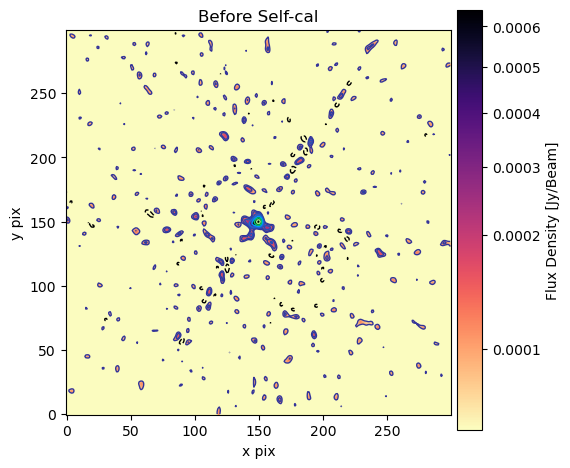

In [37]:
ax = eimshow(do_cutout_2D(ctn(image_0),box_size=150),vmin_factor=2,vmax_factor=0.5)
ax.set_title('Before Self-cal')

  >> Center -->  1540 1400
Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


Text(0.5, 1.0, 'self-cal p')

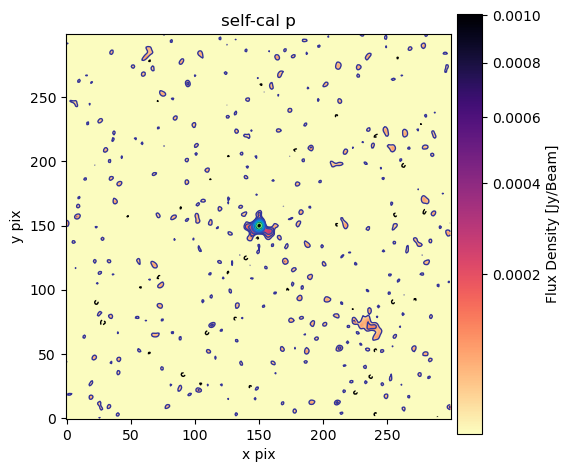

In [35]:
ax = eimshow(do_cutout_2D(ctn(image_1),box_size=150),vmin_factor=2,vmax_factor=0.5)
ax.set_title('self-cal p')

  >> Center -->  1540 1400
Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


Text(0.5, 1.0, 'self-cal p + p')

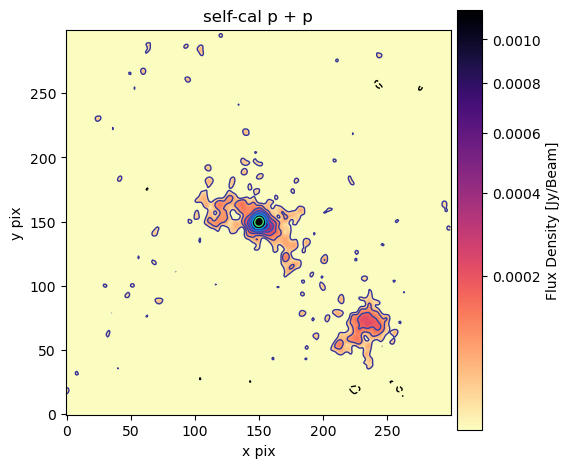

In [36]:
ax = eimshow(do_cutout_2D(ctn(image_2),box_size=150),vmin_factor=2,vmax_factor=0.5)
ax.set_title('self-cal p + p')

  >> Center -->  1540 1400
Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


Text(0.5, 1.0, 'self-cal p + p + ap')

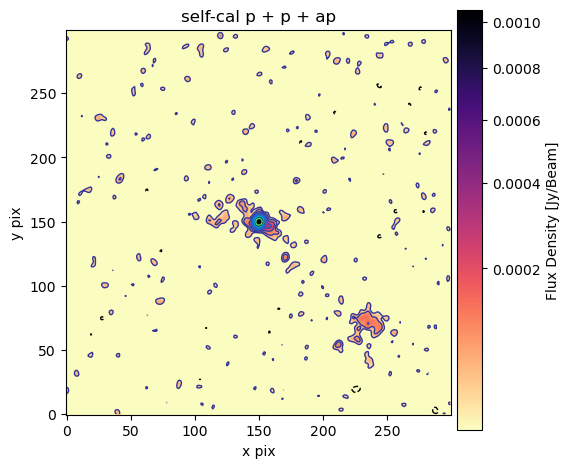

In [34]:
ax = eimshow(do_cutout_2D(ctn(image_3),box_size=150),vmin_factor=2,vmax_factor=0.5)
ax.set_title('self-cal p + p + ap')